Universidad Torcuato Di Tella

Metodos computacionales\
**Trabajo Práctico 1:
Resoluciones Numéricas de Ecuaciones Diferenciales**

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def condicion_inicial(x):
    if 0 <= x and x <= 1:
        return np.sin(np.pi * x)
    else:
        return 0
                       


def e_t_metodoexplicito(alpha, funcion, dx, dt, T):
    N  = int(round(1.0/dx))
    M = int(round(T/dt))
    x = np.arange(0, 1+dx, dx, dtype = float)
    t = np.arange(0, T+dt, dt, dtype = float)
    matriz_u = np.zeros((M+1, N+1), dtype = float)

    r  = alpha * dt / dx
    y = np.zeros(N+1)
    for pos in range(N+1):
        y[pos] =funcion(x[pos]) 
    matriz_u[0, :] = y # la primero fila se llena con la condicion inicial
    A = np.eye(N-1) #identidad de tamaño (N-1)x(N-1)
    for a in range(N-2):
        A[a, a+1] = r/2     # diagonal superior
        A[a+1, a] = -r/2    # diagonal inferior

    for n in range(M-1):
        x_vec  = matriz_u[n, 1:-1]
        b = A.dot(x_vec) 
        matriz_u[n+1, 1:-1] = b


    return matriz_u, x, t, y, r

def e_t_metodoimplicito(alpha, funcion, dx, dt, T):
    N  = int(round(1.0/dx))
    M = int(round(T/dt))
    x = np.arange(0, 1+dx, dx, dtype = float)
    t = np.arange(0, T+dt, dt, dtype = float)
    matriz_u = np.zeros((M+1, N+1), dtype = float)

    r  = alpha * dt / dx
    y = np.zeros(N+1)
    for pos in range(N+1):
        y[pos] =funcion(x[pos]) 
    matriz_u[0, :] = y # la primero fila se llena con la condicion inicial
   # construir matriz A (tridiagonal)
    A = np.eye(N-1) * (1)
    for j in range(N-2):
        A[j, j+1] = -r/2
        A[j+1, j] = r/2
    
    for n in range(M):
        b = matriz_u[n, 1:-1]
        matriz_u[n+1,1:-1] = np.linalg.solve(A, b)
    return matriz_u, x, t, y,r

In [133]:
alpha = 1.0
dx    = 0.01
dt    = 0.005
T     = 0.1

U_e, x_e, t_e, y_e, r_e = e_t_metodoexplicito(alpha, condicion_inicial, dx, dt, T)
U_i, x_i, t_i, y_i, r_i= e_t_metodoimplicito(alpha, condicion_inicial, dx, dt, T)


In [134]:
from matplotlib.animation import FuncAnimation, PillowWriter

def crear_gif(alpha, funcion, dx, dt, T, nombre_gif):
    u_ex, x_e, t_e, y_e, r_e = e_t_metodoexplicito(alpha, funcion, dx, dt, T)
    u_im, x_i, t_i, y_i, r_i= e_t_metodoimplicito(alpha, funcion, dx, dt, T)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    
    # Líneas iniciales
    line_ex, = ax1.plot(x_e, u_ex[0, :], color='blue')
    ax1.set_title("Método Explícito")
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1.1*np.max(u_ex))
    ax1.set_xlabel("x")
    ax1.set_ylabel("u(x,t)")
    ax1.grid(True)

    line_im, = ax2.plot(x_i, u_im[0, :], color='red')
    ax2.set_title("Método Implícito")
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1.1*np.max(u_ex))
    ax2.set_xlabel("x")
    ax2.set_ylabel("u(x,t)")
    ax2.grid(True)

    # Función que actualiza cada frame
    def actualizar(frame):
        line_ex.set_ydata(u_ex[frame, :])
        ax1.set_title(f"Método Explícito t={t_e[frame]:.3f}")
        line_im.set_ydata(u_im[frame, :])
        ax2.set_title(f"Método Implícito t={t_i[frame]:.3f}")
        return line_ex, line_im

    anim = FuncAnimation(fig, actualizar, frames=len(t_e), interval=100, blit=True)
    anim.save(nombre_gif, writer=PillowWriter(fps=10))
    print(f"GIF guardado como {nombre_gif}")



GIF guardado como Implicito_Explicito_transporte.gif


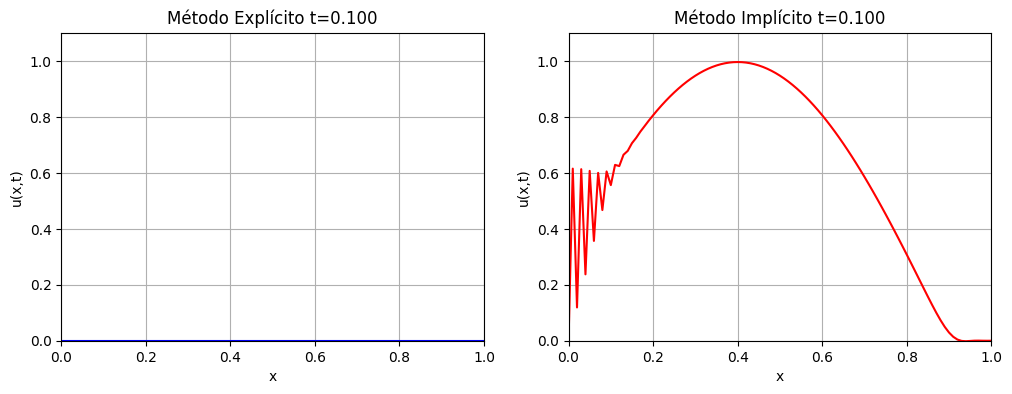

In [135]:
crear_gif(alpha, condicion_inicial, dx, dt, T, "Implicito_Explicito_transporte.gif")


GIF guardado como -1.0alpha_Implicito_Explicito_transporte.gif


C:\Users\lumil\AppData\Local\Temp\ipykernel_2932\2372715949.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, datos], ignore_index=True)


GIF guardado como -0.5alpha_Implicito_Explicito_transporte.gif
GIF guardado como -0.3alpha_Implicito_Explicito_transporte.gif
GIF guardado como -0.1alpha_Implicito_Explicito_transporte.gif
GIF guardado como 0.0alpha_Implicito_Explicito_transporte.gif
GIF guardado como 0.1alpha_Implicito_Explicito_transporte.gif
GIF guardado como 0.3alpha_Implicito_Explicito_transporte.gif
GIF guardado como 0.5alpha_Implicito_Explicito_transporte.gif
GIF guardado como 1.0alpha_Implicito_Explicito_transporte.gif


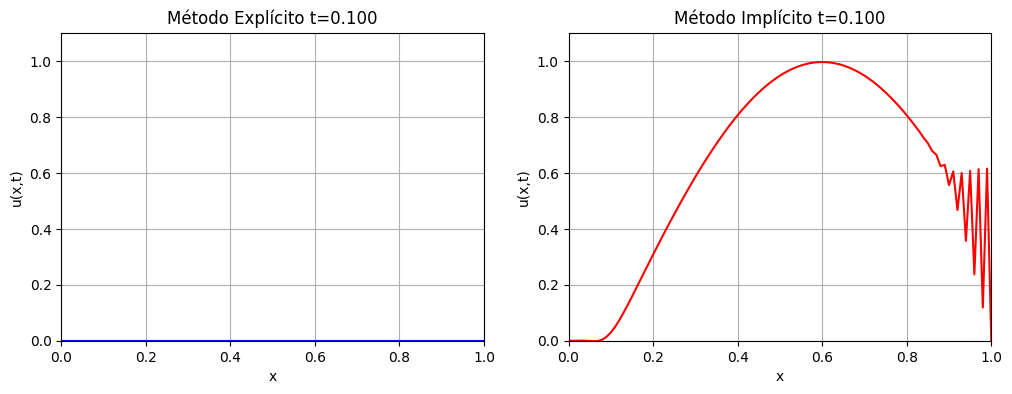

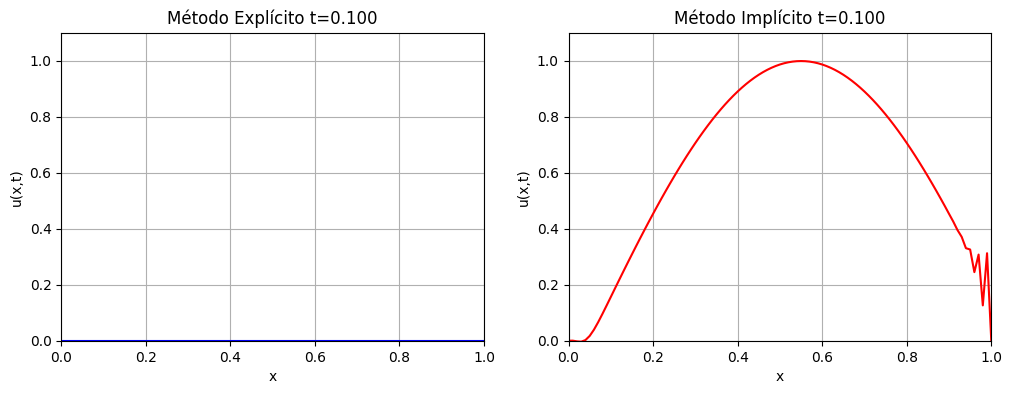

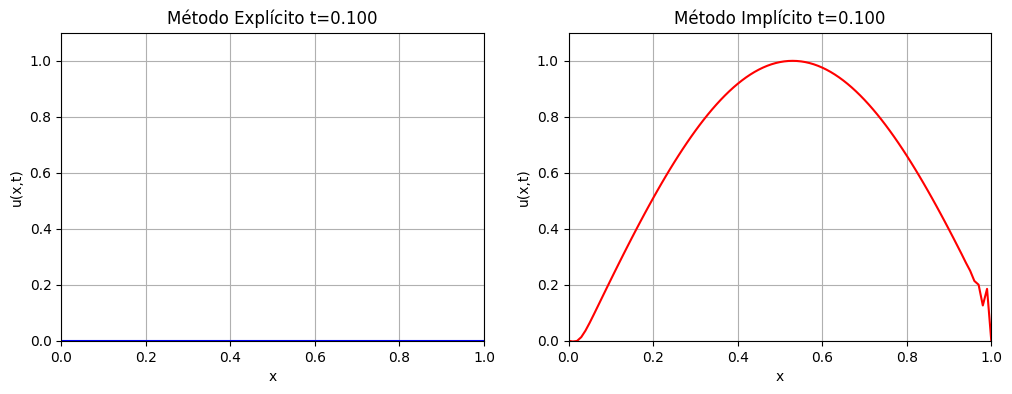

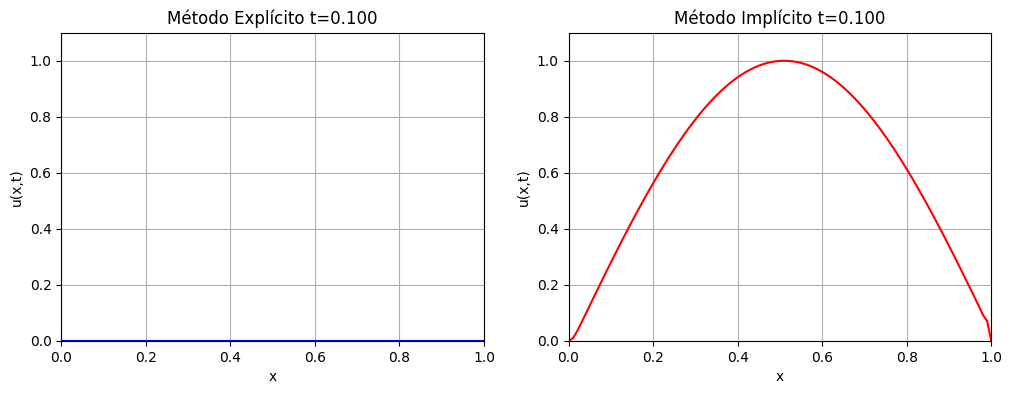

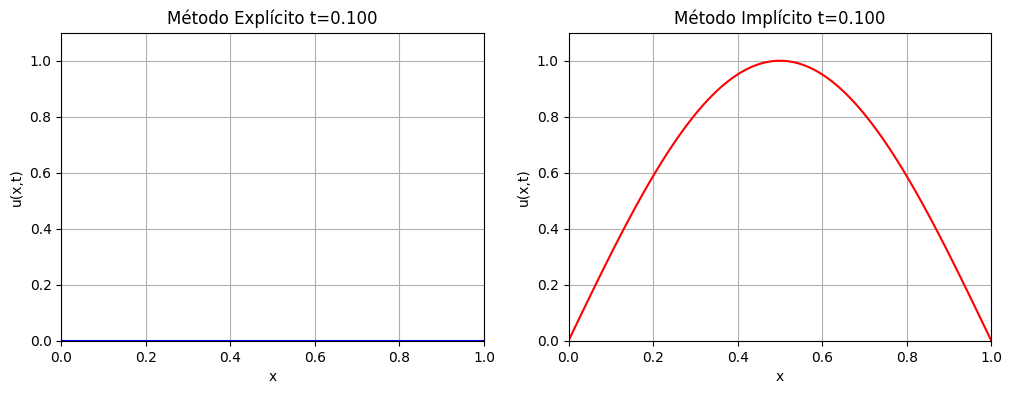

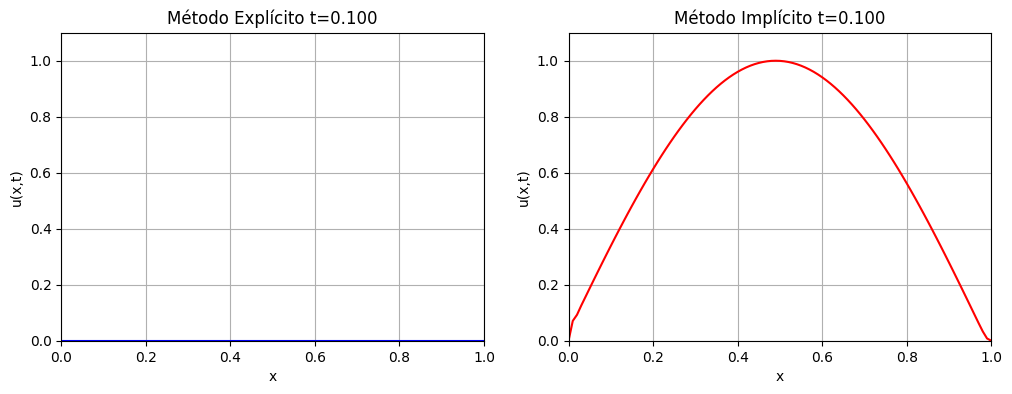

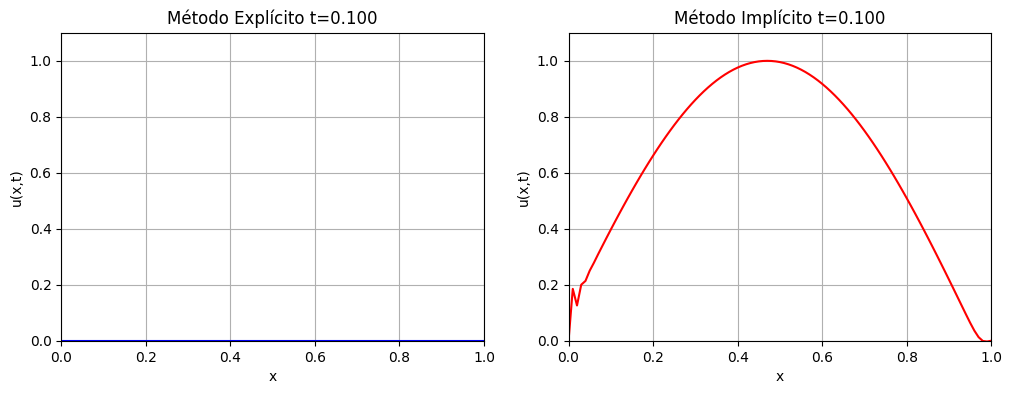

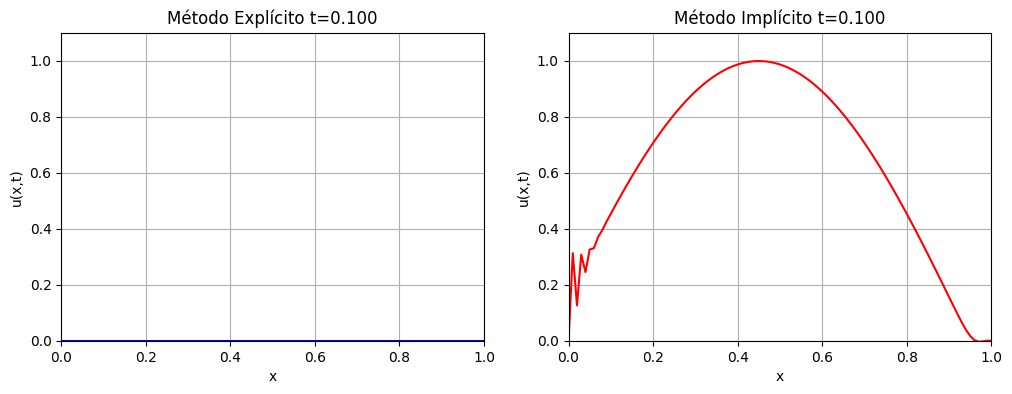

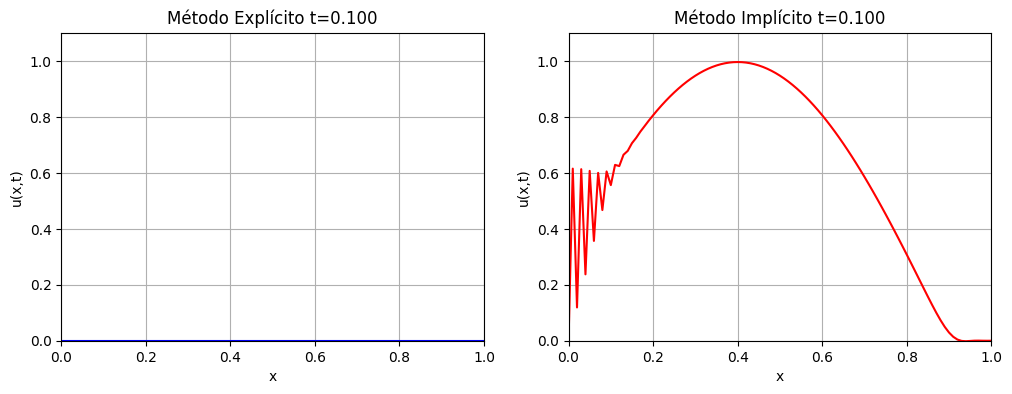

In [136]:
df= pd.DataFrame(columns=["alpha", "r_explicito", "r_implicito"])
t = np.arange(1.0, 2.1, 0.1, dtype = float)
for i in [-1.0, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3,0.5, 1.0 ]:
    U_e, x_e, t_e, y_e, r_e = e_t_metodoexplicito(i, condicion_inicial, dx, dt, T)
    U_i, x_i, t_i, y_i, r_i= e_t_metodoimplicito(i, condicion_inicial, dx, dt, T)
    crear_gif(i, condicion_inicial, dx, dt, T, f"{i}alpha_Implicito_Explicito_transporte.gif")
    datos = pd.DataFrame([{"alpha": i, "r_explicito":r_e, "r_implicito":r_i}])
    df = pd.concat([df, datos], ignore_index=True)
    

In [137]:
df

,alpha,r_explicito,r_implicito
0,-1.0,-0.50,-0.50
1,-0.5,-0.25,-0.25
2,-0.3,-0.15,-0.15
3,-0.1,-0.05,-0.05
4,0.0,0.00,0.00
5,0.1,0.05,0.05
6,0.3,0.15,0.15
7,0.5,0.25,0.25
8,1.0,0.50,0.50
